In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series,DataFrame

# 線形代数用のライプラリ
import scipy.linalg as linalg

# 最適化計算（最小値）用の関数
from scipy.optimize import minimize_scalar

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

%precision 3

'%.3f'

## 2-2 : 標準正規分布に従う乱数を10個発生させて配列を作成する

In [6]:
#乱数を固定化
random.seed(0)

norm_random_sample_data = random.randn(10)

norm_random_sample_data

array([ 1.764,  0.4  ,  0.979,  2.241,  1.868, -0.977,  0.95 , -0.151,
       -0.103,  0.411])

## 2-3 : 要素がすべて3の5行5列の行列を作成し、その行列の2乗を求める

In [5]:
m = np.ones((5,5), dtype="int")*3
print(m.dot(m))

[[45 45 45 45 45]
 [45 45 45 45 45]
 [45 45 45 45 45]
 [45 45 45 45 45]
 [45 45 45 45 45]]


## 2-4 :  与えられた行列の行列式を求める

In [12]:
a = np.array([[1,2,3],[1,3,2],[3,1,2]])

print(np.linalg.det(a))

-12.000000000000005


## 2-5 : 2-4と同じ行列について逆行列、固有値、固有ベクトルを求める

In [13]:
eig_value, eig_vector = np.linalg.eig(a)
a_inv = np.linalg.inv(a)

print('逆行列')
print(a_inv)
print('固有値')
print(eig_value)
print('固有ベクトル')
print(eig_vector)

逆行列
[[-0.333  0.083  0.417]
 [-0.333  0.583 -0.083]
 [ 0.667 -0.417 -0.083]]
固有値
[ 6.    -1.414  1.414]
固有ベクトル
[[-0.577 -0.722  0.16 ]
 [-0.577 -0.143 -0.811]
 [-0.577  0.677  0.563]]


## 2-7 : 与えられたデータに対してMoneyが500以上のデータを抽出する

In [7]:
attri_data1 = {
        'ID':['1','2','3','4','5']
        ,'Sex':['F','F','M','M','F']
        ,'Money':[1000,2000,500,300,700]
        ,'Name':['Saito','Horie','Kondo','Kawada','Matsubara']
}

attri_data_frame1 = DataFrame(attri_data1)

In [8]:
attri_data_frame1[attri_data_frame1['Money'] >= 500]

,ID,Sex,Money,Name
0,1,F,1000,Saito
1,2,F,2000,Horie
2,3,M,500,Kondo
4,5,F,700,Matsubara


## 2-8 : 2-7のデータに対して男女別の平均Moneyを求める

In [6]:
attri_data_frame1.groupby("Sex")["Money"].mean()

Sex
F    1233.333333
M     400.000000
Name: Money, dtype: float64

## 2-10 : $y = 5x + 3$ のグラフを描く

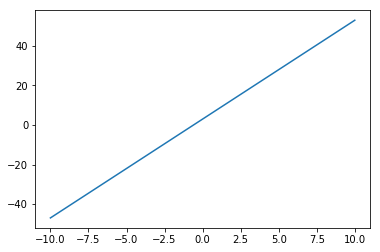

In [3]:
x = np.linspace(-10,10,100)
y = 5 * x + 3
plt.plot(x, y)
plt.show()

## 2-11 :  $y = sinx$と$y = cosx$のグラフを重ねて描く

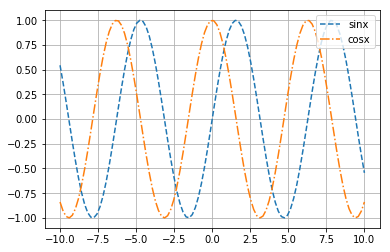

In [5]:
x = np.linspace(-10,10,100)
plt.plot(x, np.sin(x), label='sinx', linestyle='--')
plt.plot(x, np.cos(x), label='cosx', linestyle='-.')
plt.legend(loc=True)
plt.grid()
plt.show()

## 総合問題
モンテカルロ法を試す

1）区間[0,1]上の一様分布に従う乱数を2組発生させて、それぞれ10,000個の一様乱数を作ってみましょう。なお、一様乱数とは、ある数から数まで等確率で発生する乱数のことをいい、np.random.uniformを使います。使い方としては、0から1までの数を10個発生させる場合は、np.random.uniform(0.0, 1.0, 10)とします。

In [8]:
import math

N = 10000
x = np.random.uniform(0.0, 1.0, N)
y = np.random.uniform(0.0, 1.0, N)

2）$x−y$軸を使った中心$(0,0)$、半径1の円と、長さ1の正方形を考えたとき、円の面積は$\pi$となり、正方形の面積は1となります。先ほど（1）で作った、$x$と$y$の組み合わせの乱数10,000個のうち、この円の内部に入る点は何組あるでしょうか。

ここで、円の内部に入るとは、$x−y$座標の原点から点$ (x, y) $のベクトルの長さを求め、それが1より小さくなる場合を判定基準とします。なお、その長さを求めるために、ユークリッドノルム($\sqrt{x^2 + y^2}$)を使い、 `math.hypot(x,y)`で計算できます。さらに、余裕があれば、円の中に入った$x$と$y$の組み合わせと外に出た$x$と$y$の組み合わせをプロットして図にしてみましょう。

In [9]:
# 円の中に入ったxとy
inside_x = []
inside_y = []

# 円の外に出たxとy
outside_x = []
outside_y = []

count_inside = 0
for count in range(0, N):
    d = math.hypot(x[count],y[count])
    if d < 1:
        count_inside += 1
        # 円の内部に入った時のxとyの組み合わせ
        # appendはリストに要素を追加するメソッド
        inside_x.append(x[count])
        inside_y.append(y[count])
    else:
        # 円の外に出た時のxとyの組み合わせ
        outside_x.append(x[count])
        outside_y.append(y[count])
    
print("円の内部に入った数:",count_inside)

円の内部に入った数: 7891


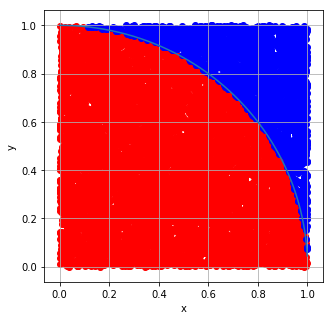

In [10]:
# さらに図にする
# 図のサイズ
plt.figure(figsize=(5,5))

# 円を描くためのデータ
circle_x = np.arange(0,1,0.001)
circle_y = np.sqrt(1- circle_x * circle_x)

# 円を描く
plt.plot(circle_x, circle_y) 

# 円の中に入っているのが、red
plt.scatter(inside_x,inside_y,color="r")
# 円の外に出たのが、blue
plt.scatter(outside_x,outside_y,color="b")

plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

（3）半径1の1/4の円の面積と長さ1の正方形の面積の比は、$ \pi /4 : 1$となります。これと（2）の結果を利用して、円周率を求めてみましょう。

In [11]:
print ("円周率の近似値:",4.0 * count_inside / N)

円周率の近似値: 3.1564
